In [1]:
# Added the necessary libraries.

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
# Suppressing warning messages to keep the output clean.
warnings.filterwarnings('ignore')

In [3]:
# Loaded the dataset and checked its appearance.
dataset = pd.read_csv('car_details.csv')

# Examining the first three terms.
dataset.head(3) 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


In [4]:
# Checked the last part of the dataset and also obtained information about the number of records.
dataset.tail(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [5]:
# Obtained information about the dataset size.
dataset.shape

(8128, 13)

In [6]:
# Retrieved information about the dataset's features and their types.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
# Starting the process by copying the dataset as a precaution against potential issues.
df = dataset.copy() 

# Removing duplicates for all rows.
df = df.drop_duplicates()

In [8]:
# Identifying all columns of type 'object'.
object_columns = df.select_dtypes(include=['object']).columns

# Converting these columns to the 'Categorical' type in bulk because pandas cannot efficiently work with objects.
df[object_columns] = df[object_columns].apply(lambda col: pd.Categorical(col))

In [9]:
# Performing a check after the process.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           6926 non-null   category
 1   year           6926 non-null   int64   
 2   selling_price  6926 non-null   int64   
 3   km_driven      6926 non-null   int64   
 4   fuel           6926 non-null   category
 5   seller_type    6926 non-null   category
 6   transmission   6926 non-null   category
 7   owner          6926 non-null   category
 8   mileage        6718 non-null   category
 9   engine         6718 non-null   category
 10  max_power      6721 non-null   category
 11  torque         6717 non-null   category
 12  seats          6718 non-null   float64 
dtypes: category(9), float64(1), int64(3)
memory usage: 486.2 KB


In [10]:
# How many missing values are there?
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
torque           209
seats            208
dtype: int64

In [11]:
# Removing records with missing values.
df = df.dropna()

In [12]:
# Checking the current state of the dataset.
df.shape

(6717, 13)

In [13]:
# Some columns contain letters, etc. To use them in the model, we remove the letters and convert them to numeric types.

# Columns that need to be converted to numeric data type:
numeric_columns = ['mileage', 'engine', 'max_power', 'torque']

# Removing non-numeric characters and converting the columns to numeric values.
for column in numeric_columns:
    # Remove non-numeric characters and convert to numeric values.
    df[column] = pd.to_numeric(df[column].str.extract('(\d+\.?\d*)')[0], errors='coerce')
    
# Checking the converted data.
df[numeric_columns].head(3)

,mileage,engine,max_power,torque
0,23.40,1248,74.00,190.0
1,21.14,1498,103.52,250.0
2,17.70,1497,78.00,12.7


In [14]:
# Reviewing all the changes made to the dataset.
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,12.7,5.0


In [15]:
# How many missing observations are in the dataset? Checking.
df.isnull().sum() 

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [16]:
# Preparing categorical variables for use with Label Encoding (ordinal categories).

# Select categorical variables.
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']

# Applying LabelEncoder to each categorical variable.
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le  # Save the encoders to reverse the transformations later if needed.

In [17]:
# Reviewing the final state of the variables in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           6717 non-null   category
 1   year           6717 non-null   int64   
 2   selling_price  6717 non-null   int64   
 3   km_driven      6717 non-null   int64   
 4   fuel           6717 non-null   int64   
 5   seller_type    6717 non-null   int64   
 6   transmission   6717 non-null   int64   
 7   owner          6717 non-null   int64   
 8   mileage        6717 non-null   float64 
 9   engine         6717 non-null   int64   
 10  max_power      6717 non-null   float64 
 11  torque         6717 non-null   float64 
 12  seats          6717 non-null   float64 
dtypes: category(1), float64(4), int64(8)
memory usage: 775.9 KB


In [18]:
# Taking a look at the dataset.
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,0,23.40,1248,74.00,190.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14,1498,103.52,250.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,3,1,1,4,17.70,1497,78.00,12.7,5.0


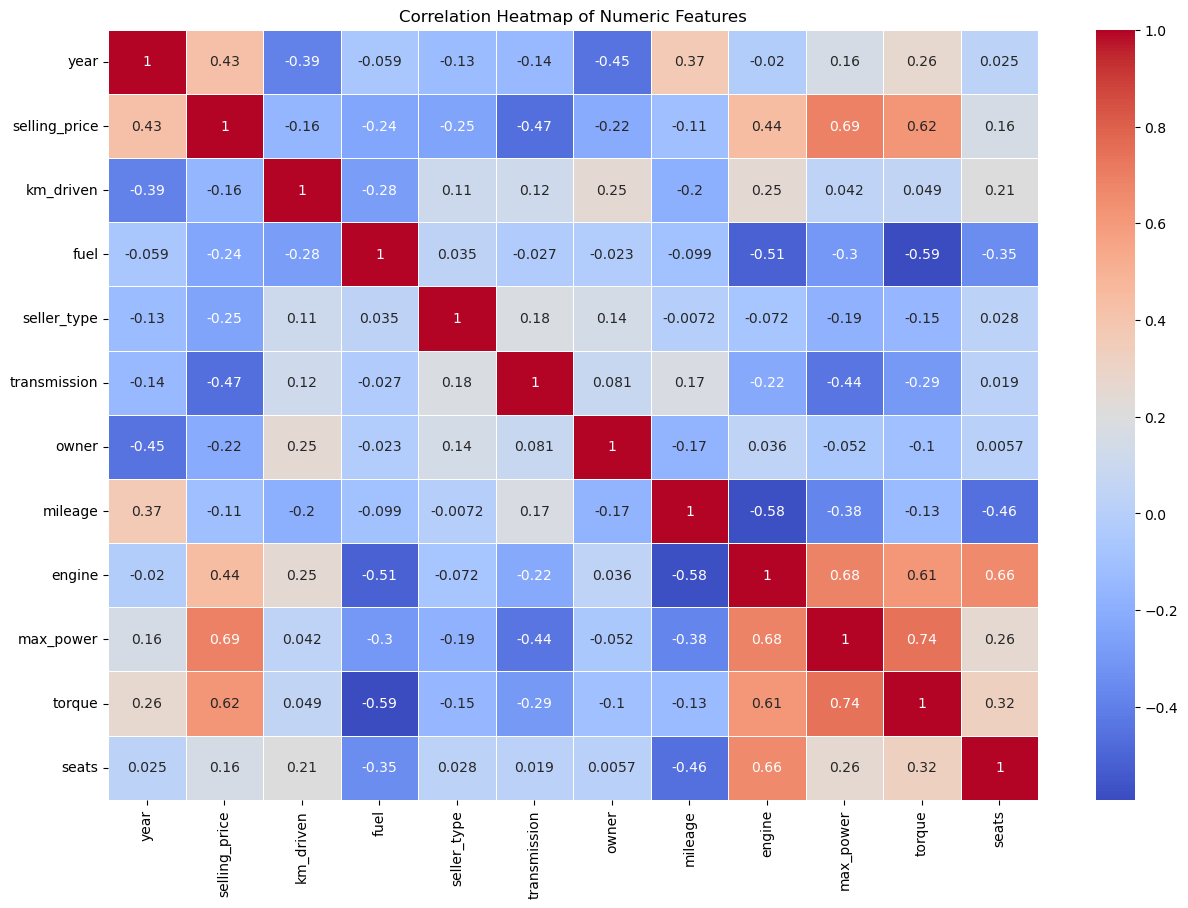

In [19]:
# Checking the correlation between the variables.

# Selecting only the numeric columns.
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Creating a correlation matrix with the numeric columns.
correlation_matrix = numeric_df.corr()

# Visualizing the correlation matrix.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [20]:
# Checking for missing values one last time.
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [21]:
# Creating 'Brand': Generating a variable for use in the model.

# Extracting the first two words from the 'name' column and adding them as the 'brand' column.
df['brand'] = df['name'].str.split(' ', n=2).str[:2].str.join(' ')

# Applying Label Encoding to convert the 'brand' column to numeric format.
label_encoder = LabelEncoder()
df['brand'] = label_encoder.fit_transform(df['brand'])

# We can save the Label Encoder for future use.
label_encoders = {'brand': label_encoder}

# The 'brand' column has now been converted to numeric.
print(df[['brand']].head())

   brand
0    120
1    155
2     55
3     75
4    120


In [22]:
# Creating variables:
df['brand^2'] = df['brand'] ** 2
df['engine_efficiency'] = df['max_power'] / df['engine']

In [23]:
# Let's check how our dataset looks after all the operations we've performed.
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,brand^2,engine_efficiency
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,0,23.40,1248,74.00,190.0,5.0,120,14400,0.059295
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14,1498,103.52,250.0,5.0,155,24025,0.069105
2,Honda City 2017-2020 EXi,2006,158000,140000,3,1,1,4,17.70,1497,78.00,12.7,5.0,55,3025,0.052104
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,0,23.00,1396,90.00,22.4,5.0,75,5625,0.064470
4,Maruti Swift VXI BSIII,2007,130000,120000,3,1,1,0,16.10,1298,88.20,11.5,5.0,120,14400,0.067951


In [24]:
# Observing outliers in the dataset; we will clean them accordingly.
print("Mean: " + str(df["selling_price"].mean()))
print("Number of Non-Missing Observations: " + str(df["selling_price"].count()))
print("Maximum Value: " + str(df["selling_price"].max()))
print("Minimum Value: " + str(df["selling_price"].min()))
print("Median: " + str(df["selling_price"].median()))
print("Standard Deviation: " + str(df["selling_price"].std()))

Mean: 526385.9970224802
Number of Non-Missing Observations: 6717
Maximum Value: 10000000
Minimum Value: 29999
Median: 420000.0
Standard Deviation: 523550.448296879


In [25]:
# Removing vehicles with more than 5 seats as they are considered outliers.
df = df[df['seats'] <= 5]

In [26]:
# Gathering some information about the dataset.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5380.0,2013.557807,4.023472,1994.000000,2011.000000,2014.000000,2017.000000,2.020000e+03
selling_price,5380.0,476208.325279,509922.635640,29999.000000,225000.000000,375000.000000,585000.000000,1.000000e+07
km_driven,5380.0,67870.366729,53626.305396,1.000000,35000.000000,60000.000000,90000.000000,2.360457e+06
fuel,5380.0,2.057807,1.009070,0.000000,1.000000,3.000000,3.000000,3.000000e+00
seller_type,5380.0,0.901115,0.314309,0.000000,1.000000,1.000000,1.000000,2.000000e+00
transmission,5380.0,0.912825,0.282117,0.000000,1.000000,1.000000,1.000000,1.000000e+00
owner,5380.0,0.878439,1.249688,0.000000,0.000000,0.000000,2.000000,4.000000e+00
mileage,5380.0,20.407861,3.630846,0.000000,18.120000,20.340000,22.900000,4.200000e+01
engine,5380.0,1269.282156,311.777214,624.000000,1086.000000,1248.000000,1461.000000,3.604000e+03
max_power,5380.0,83.190651,29.172252,32.800000,67.100000,78.900000,88.800000,4.000000e+02


In [27]:
# We need to clean the outliers in the dataset.

# Removing outliers based on numerical conditions.
def filter_by_conditions(df):
    # Filtering the 'year' variable to include only values between 1994 and 2020.
    df = df[(df['year'] >= 1994) & (df['year'] <= 2020)]
    
    # For the 'selling_price' variable:
    df = df[(df['selling_price'] >= 100000) & (df['selling_price'] <= 900000)]
    
    # Filtering the 'km_driven' variable to include only values between 1 and 135,000.
    df = df[(df['km_driven'] >= 1) & (df['km_driven'] <= 135000)]
    
    return df

# Applying the filtering process.
df = filter_by_conditions(df)
df.shape

(4480, 16)

In [28]:
# Function to clean outliers using the IQR method.
def remove_outliers(df, column, multiplier=1.25):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_cleaned = remove_outliers(df, 'engine', multiplier=1.5)  
df_cleaned = remove_outliers(df, 'torque', multiplier=2.0)  

# Assigning the cleaned data back to the original dataframe.
df = df_cleaned

# Checking the dimensions of the cleaned dataset.
df.shape

(4476, 16)

In [29]:
# Reviewing the information again.

print("Mean: " + str(df["selling_price"].mean()))
print("Number of Non-Missing Observations: " + str(df["selling_price"].count()))
print("Maximum Value: " + str(df["selling_price"].max()))
print("Minimum Value: " + str(df["selling_price"].min()))
print("Median: " + str(df["selling_price"].median()))
print("Standard Deviation: " + str(df["selling_price"].std()))

Mean: 407678.46179624664
Number of Non-Missing Observations: 4476
Maximum Value: 900000
Minimum Value: 100000
Median: 375000.0
Standard Deviation: 199543.59972900423


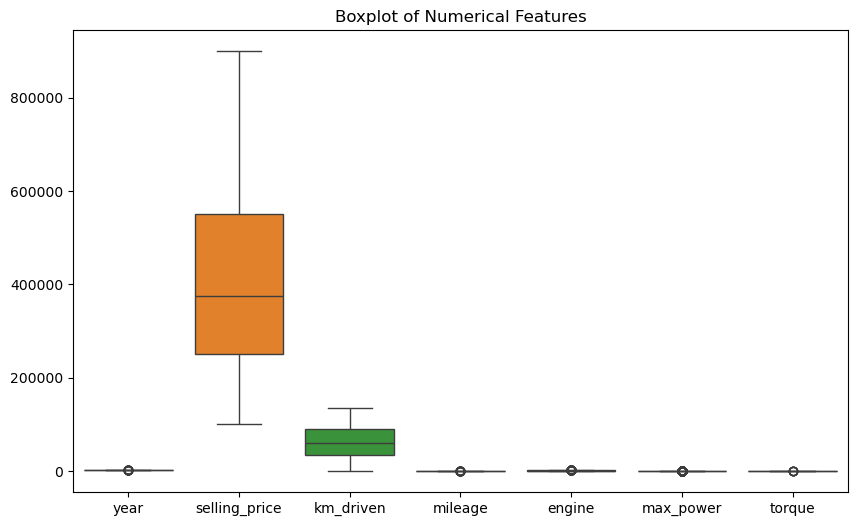

In [30]:
# Creating a boxplot to visualize outliers.
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque']])
plt.title('Boxplot of Numerical Features')
plt.show()

Based on this information, we can select the features to use in the model.
Guidelines for selection:
* Choose only one feature among those with a correlation of |0.8| or higher (positive or negative).
* Evaluate features with a correlation between |0.3| and |0.7| carefully and be selective if necessary.
* Consider keeping features with a correlation of |0.2| or lower, as they often provide independent information.


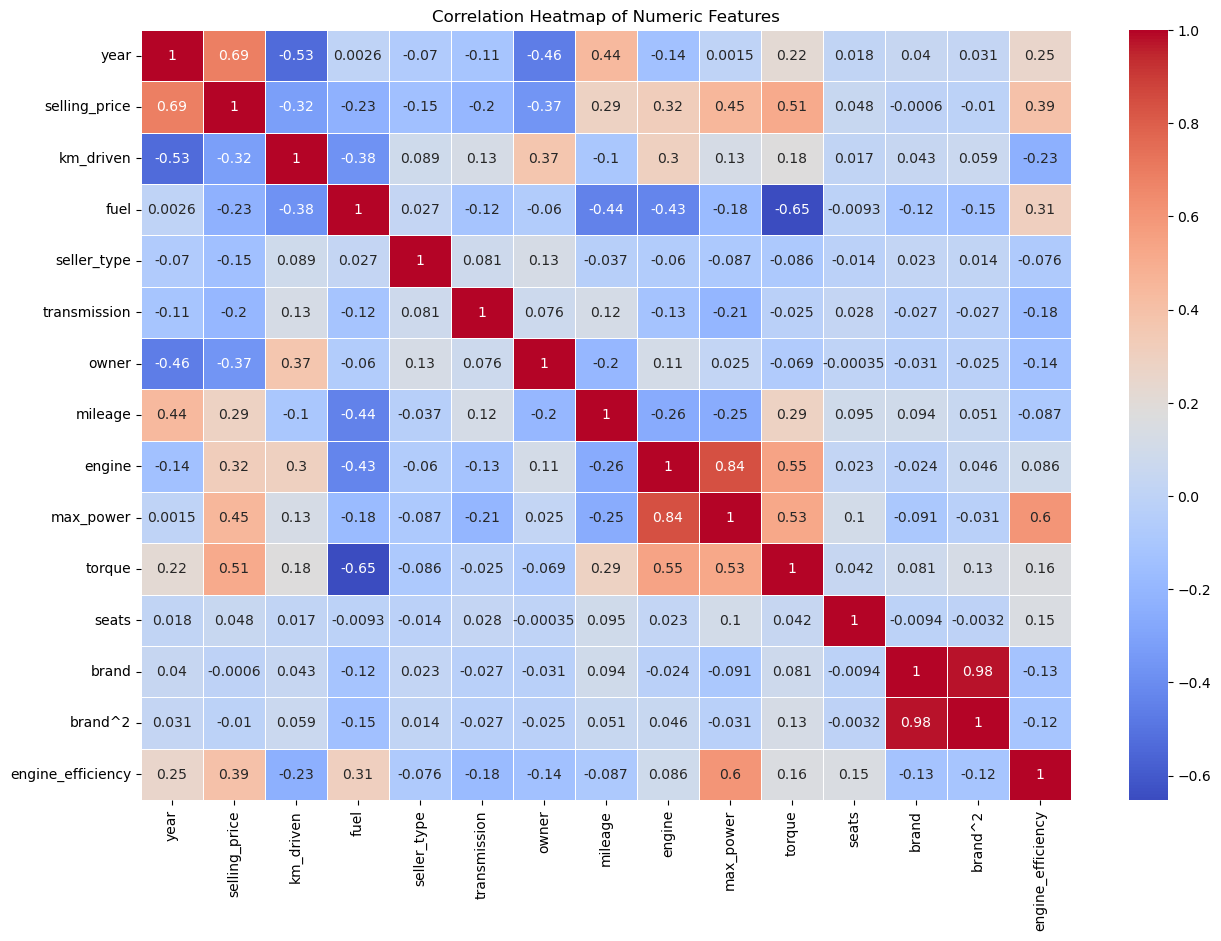

In [32]:
# Checking the correlation between the variables.

# Selecting only the numeric columns.
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Sayısal sütunlarla korelasyon matrisini oluşturma
correlation_matrix = numeric_df.corr()

# Creating a correlation matrix with the numeric columns.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [33]:
# Scaling: Scaling the variables to improve model performance.

# Select the features you want to use.
features = ['year', 'km_driven', 'fuel', 'seller_type',
            'transmission', 'owner', 'mileage', 'engine',
            'max_power' ,'torque', 'brand', 'selling_price',
            'engine_efficiency', 'brand^2']

# Scale the selected features.
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

In [34]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,brand^2,engine_efficiency
1,Skoda Rapid 1.5 TDI Ambition,0.739130,0.33750,0.888888,0.333333,0.5,1.0,0.5,0.632177,0.368310,0.345219,0.652685,5.0,0.801047,0.644946,0.441764
3,Hyundai i20 Sportz Diesel,0.565217,0.15625,0.940740,0.333333,0.5,1.0,0.0,0.687799,0.325327,0.277888,0.044617,5.0,0.382199,0.150920,0.394185


In [35]:
# Model Building and Training Section.
# Separate the features and target variable.

X = df[['year', 'km_driven', 'fuel', 'seller_type',
        'transmission', 'owner', 'mileage', 'max_power',
        'torque', 'brand^2', 'engine', 'engine_efficiency']] 

y = df['selling_price']

In [36]:
# Splitting the data into 95% training and 5% testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [37]:
# Define the model.
model = Sequential()

# Input Layer
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))

# Define the first hidden layer.
model.add(Dense(64, activation='relu'))

# Second hidden layer
model.add(Dense(64, activation='relu'))

# Third hidden layer
model.add(Dense(32, activation='relu'))

# Output layer (no activation function since it's regression)
model.add(Dense(1))

In [38]:
# Create the Adam optimizer with default parameters.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model.
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the model.
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

Epoch 1/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 0.1167 - mae: 0.2689 - val_loss: 0.0215 - val_mae: 0.1144
Epoch 2/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 0.0206 - mae: 0.1115 - val_loss: 0.0160 - val_mae: 0.0999
Epoch 3/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 0.0167 - mae: 0.0984 - val_loss: 0.0176 - val_mae: 0.1039
Epoch 4/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 0.0158 - mae: 0.0956 - val_loss: 0.0182 - val_mae: 0.1072
Epoch 5/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 0.0150 - mae: 0.0933 - val_loss: 0.0137 - val_mae: 0.0924
Epoch 6/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 0.0133 - mae: 0.0870 - val_loss: 0.0130 - val_mae: 0.0893
Epoch 7/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 0.0135 - mae: 0.0888 - val_loss: 0.0148 - val_mae: 0.0933
Epoch 8/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 0.0130 - mae: 0.0863 - val_loss: 0.0135 - val_mae: 0.0926
Epoch 9/100
133/133 ━━━━━━━━━━━━

In [39]:
# Generating predictions for the test set using the trained model.
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step


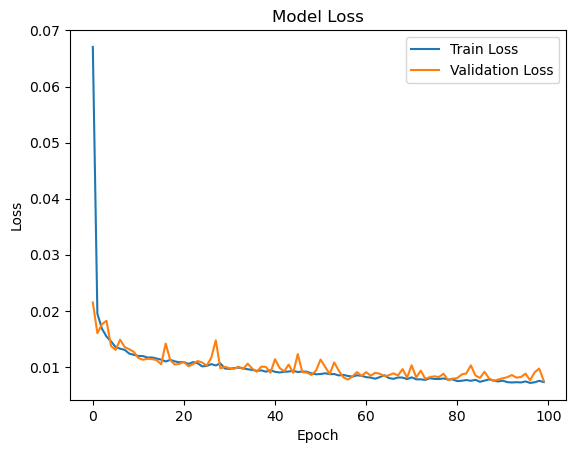

In [40]:
# Visualize the loss during the training process.

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [41]:
# Let's see how successful the model is:

# Training set predictions and evaluation.
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

# Test set predictions and evaluation.
y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

# Print the results.
print("Training Set Evaluation:")
print(f"R-squared: {r2_train:.2f}")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}\n")

print("Test Set Evaluation:")
print(f"R-squared: {r2_test:.2f}")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step
Training Set Evaluation:
R-squared: 0.89
MAE: 0.06
MSE: 0.01
RMSE: 0.08

Test Set Evaluation:
R-squared: 0.88
MAE: 0.07
MSE: 0.01
RMSE: 0.09
